In [1]:

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.llms.huggingface import HuggingFaceLLM

d:\a27_YEARS_OLD\RAG\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# load documents
documents = SimpleDirectoryReader("data").load_data()

In [4]:
print(documents)

[Document(id_='d00db0b3-11e3-4fb2-a88b-de866c2abe02', embedding=None, metadata={'file_path': 'd:\\a27_YEARS_OLD\\RAG\\data\\data.txt', 'file_name': 'data.txt', 'file_type': 'text/plain', 'file_size': 39750, 'creation_date': '2025-01-08', 'last_modified_date': '2025-01-08'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \r\n\r\nLast year COVID-19 kept us apart. This year we are finally together again. \r\n\r\nTonight, we meet as Democrats Republicans and Independents. But most 

In [5]:
from llama_index.core import PromptTemplate

In [6]:
# setup prompts - specific to StableLM
system_prompt = """<|SYSTEM|># You are a Q&A assistant. Your goal is to answer questions as
accurately as possible based on the instructions and context provided.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

In [29]:
query_wrapper_prompt


PromptTemplate(metadata={'prompt_type': <PromptType.CUSTOM: 'custom'>}, template_vars=['query_str'], kwargs={}, output_parser=None, template_var_mappings=None, function_mappings=None, template='<|USER|>{query_str}<|ASSISTANT|>')

In [ ]:
# System Prompt:
# The system_prompt defines the role and goal of the assistant:
# # You are a Q&A assistant.: Specifies the assistant's role.
# Your goal is to answer questions as accurately as possible based on the instructions and context provided.: Defines the assistant's objective.
# Query Wrapper Prompt:
# The query_wrapper_prompt is a template that wraps the user's query with specific tags:
# <|USER|>{query_str}<|ASSISTANT|>: Surrounds the user's query with <|USER|> and <|ASSISTANT|> tags.

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.environ["langchain_api_key"]

In [16]:

# import torch

llm = HuggingFaceLLM(
    context_window=1000,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="mistralai/Mistral-7B-Instruct-v0.1",
    model_name="mistralai/Mistral-7B-Instruct-v0.1",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 1000},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-677e6af8-2d52d43573cce80324850fa0;6c45c32c-bbf7-44b3-9aff-e5e4100e4b6f)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and be authenticated to access it. Please log in.

In [ ]:

# You're initializing a Hugging Face LLM (Large Language Model) with specific configuration settings.
# Configuration Breakdown:
# Here's a summary of the configuration settings:
# Context Window: context_window=4096 - Sets the maximum context window size.
# Max New Tokens: max_new_tokens=256 - Specifies the maximum number of new tokens to generate.
# Generation Settings:
# temperature=0.7 - Controls the randomness of generated text.
# do_sample=False - Disables sampling and instead uses greedy decoding.
# System Prompt: system_prompt=system_prompt - Sets the system prompt for the model.
# Query Wrapper Prompt: query_wrapper_prompt=query_wrapper_prompt - Specifies the query wrapper prompt.
# Tokenizer and Model:
# tokenizer_name="mistralai/Mistral-7B-Instruct-v0.1" - Sets the tokenizer name.
# model_name="mistralai/Mistral-7B-Instruct-v0.1" - Specifies the model name.
# Device Map: device_map="auto" - Automatically maps the model to available devices (e.g., GPU, CPU).
# Stopping IDs: stopping_ids=[50278, 50279, 50277, 1, 0] - Specifies the IDs to stop generation at.

In [15]:

from llama_index.embeddings.huggingface import HuggingFaceEmbedding
embed_model =HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")

d:\a27_YEARS_OLD\RAG\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\AppData\Local\llama_index\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
import llama_index
from llama_index.core import Settings
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core.node_parser import SentenceSplitter

In [33]:
from llama_index.llms.gemini import Gemini

In [34]:
# Settings.llm = HuggingFaceLLM(model_name="mistralai/Mistral-7B-Instruct-v0.1")
# Settings.llm = HuggingFaceLLM(model_name="meta-llama/Llama-2-7b-hf")
Settings.llm = Gemini(model="models/gemini-pro")



In [22]:

Settings.embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")
Settings.node_parser = SentenceSplitter(chunk_size=800, chunk_overlap=20)
Settings.num_output = 512
Settings.context_window = 3900

In [24]:
index = VectorStoreIndex.from_documents(documents)

In [ ]:

# You're creating a VectorStoreIndex from a list of documents using the from_documents method.
# VectorStoreIndex:
# The VectorStoreIndex is a data structure that allows for efficient similarity searches and retrieval of documents based on their vector representations.
# Parameters:
# You're passing the following parameters to the from_documents method:
# documents: A list of documents to be indexed.
# service_context: A ServiceContext object that provides additional configuration and context for the indexing process

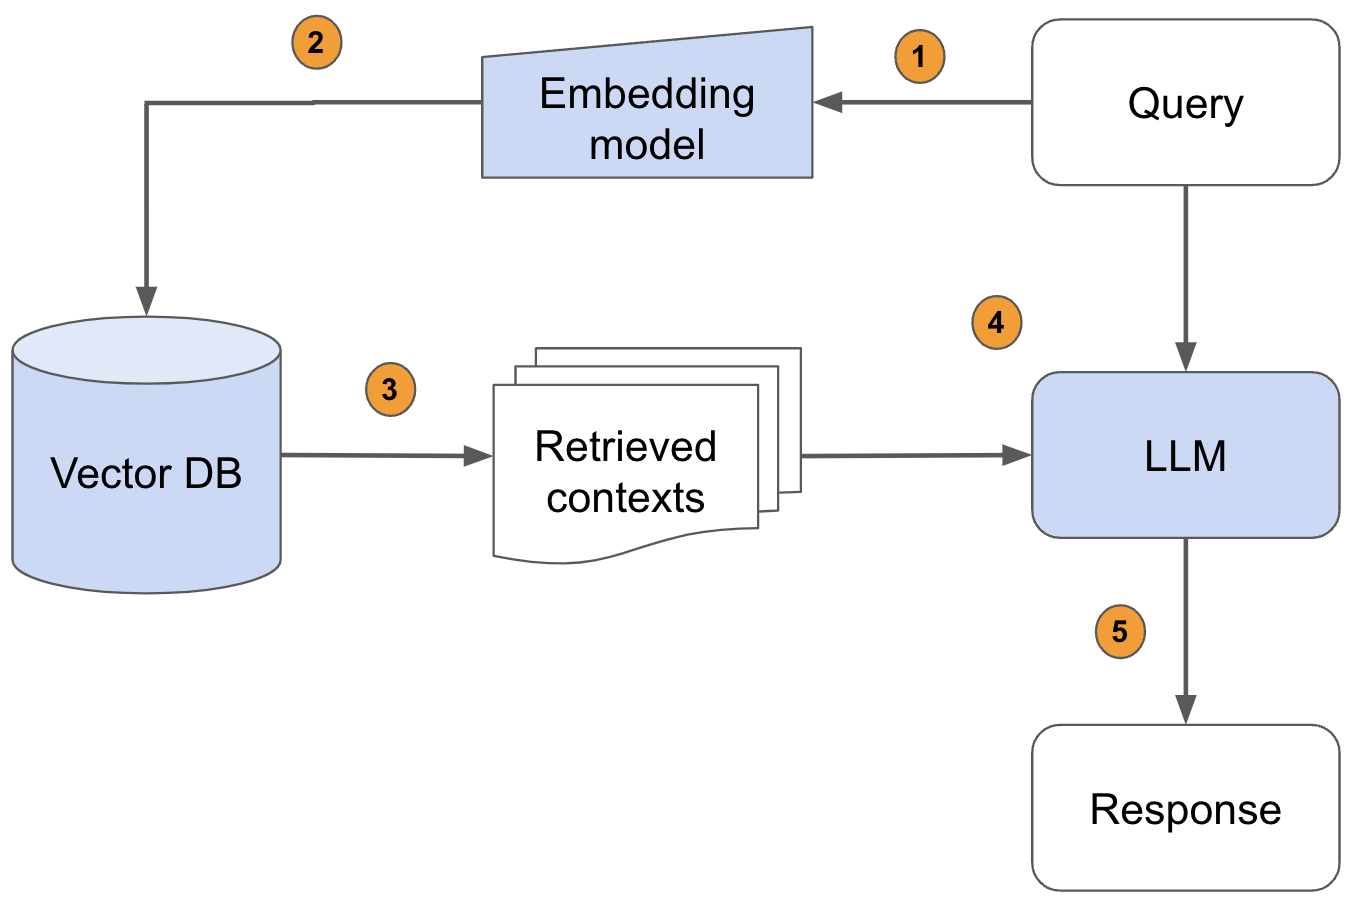

In [35]:
query_engine = index.as_query_engine()

In [37]:

query_engine.query("what is attention?") # query engine made of retriver and llm to both of them query is given to get refine results

Response(response='The provided context does not mention anything about attention, so I cannot answer this question from the provided context.', source_nodes=[NodeWithScore(node=TextNode(id_='94e4b4f7-86ad-486d-973d-583e064e74ec', embedding=None, metadata={'file_path': 'd:\\a27_YEARS_OLD\\RAG\\data\\data.txt', 'file_name': 'data.txt', 'file_type': 'text/plain', 'file_size': 39750, 'creation_date': '2025-01-08', 'last_modified_date': '2025-01-08'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='d00db0b3-11e3-4fb2-a88b-de866c2abe02', node_type='4', metadata={'file_path': 'd:\\a27_YEARS_OLD\\RAG\\data\\data.txt', 'file_name': 'data.txt', 'file_type': 'text/plain', 'file_size': 39750, 'creation_date': '2025-01